<a href="https://colab.research.google.com/github/AndreiAf02/Math574_Project/blob/main/SIR_Fitting_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm

##Google Trends Data:

In [3]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Math574_Project/main/'

In [4]:
data_Google = pd.read_csv(path_to_data + "Google_trends.csv", sep=",", header=0)
data_Google

,Day_trump,trump_scaled,Day_v2,iran_scaled,moo deng,raygun_scaled,moo_deng_scaled,columb_dna,Day_v3,brics
0,2024-07-02,3052.503053,2024-07-25,626.566416,0.000000,0.000000,0,0,2024-07-27,15
1,2024-07-03,3052.503053,2024-07-26,751.879699,0.000000,0.000000,0,0,2024-07-28,20
2,2024-07-04,3052.503053,2024-07-27,877.192982,0.000000,0.000000,0,0,2024-07-29,20
3,2024-07-05,2035.002035,2024-07-28,877.192982,0.000000,0.000000,0,0,2024-07-30,15
4,2024-07-06,2035.002035,2024-07-29,877.192982,0.000000,0.000000,0,0,2024-07-31,20
...,...,...,...,...,...,...,...,...,...,...
88,2024-09-28,3052.503053,2024-10-21,1378.446116,19.047619,23.809524,100,1,2024-10-23,340
89,2024-09-29,3052.503053,2024-10-22,1503.759399,19.047619,23.809524,105,0,2024-10-24,500
90,2024-09-30,3052.503053,2024-10-23,1253.132832,19.047619,23.809524,100,4,2024-10-25,385
91,2024-10-01,3052.503053,2024-10-24,1253.132832,19.047619,47.619048,105,2,2024-10-26,245


#Rachael Gunn ('Raygun'):

         raygun
0      0.000000
1    261.904762
2   1523.809524
3   2047.619048
4   2380.952381
5   2119.047619
6   1666.666667
7   1833.333334
8   1452.380953
9    952.380953
10   833.333333
11   547.619047
12   333.333333
13   238.095238
14   214.285714
15   166.666667
16   166.666667
17   142.857143
18    95.238095
19    71.428571
20    71.428571
21    71.428571
22    71.428571
23    95.238095
24    71.428571
25    71.428571
26    47.619048


Text(0, 0.5, 'Activity')

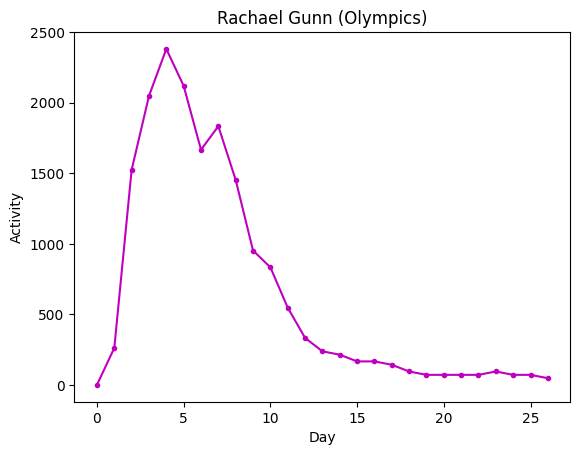

In [5]:
data_raygun=pd.DataFrame()
data_raygun['raygun'] = data_Google['raygun_scaled']
data_raygun = data_raygun[14:41].reset_index(drop=True)

# data_raygun.reset_index(drop=True)
print(data_raygun)
plt.plot(data_raygun, 'm.-')
plt.title('Rachael Gunn (Olympics)')
plt.xlabel('Day')
plt.ylabel('Activity')

## Moo Deng:

Text(0, 0.5, 'Activity')

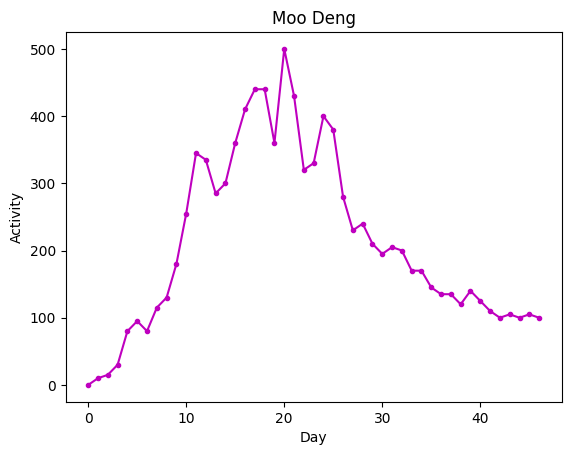

In [ ]:
data_moo = pd.DataFrame(data_Google['moo_deng_scaled'])
data_moo = data_moo[46:].reset_index(drop=True)
plt.plot(data_moo, 'm.-')
plt.title('Moo Deng')
plt.xlabel('Day')
plt.ylabel('Activity')

## Christopher Columbus:

Text(0, 0.5, 'Activity')

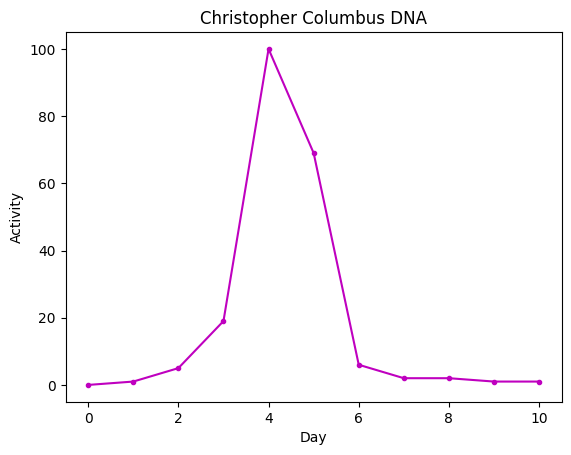

In [132]:
data_columb = pd.DataFrame(data_Google['columb_dna'])
data_columb = data_columb[77:88].reset_index(drop=True)
plt.plot(data_columb, 'm.-')
plt.title('Christopher Columbus DNA')
plt.xlabel('Day')
plt.ylabel('Activity')

## Trump:

Text(0, 0.5, 'Activity')

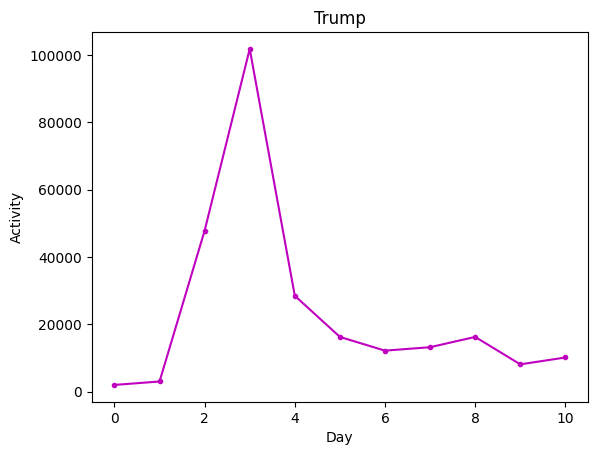

In [ ]:
data_trump = pd.DataFrame(data_Google['trump_scaled'])
data_trump = data_trump[9:20].reset_index(drop=True)
# print(data_raygun)
plt.plot(data_trump, 'm.-')
plt.title('Trump')
plt.xlabel('Day')
plt.ylabel('Activity')

##Iran:

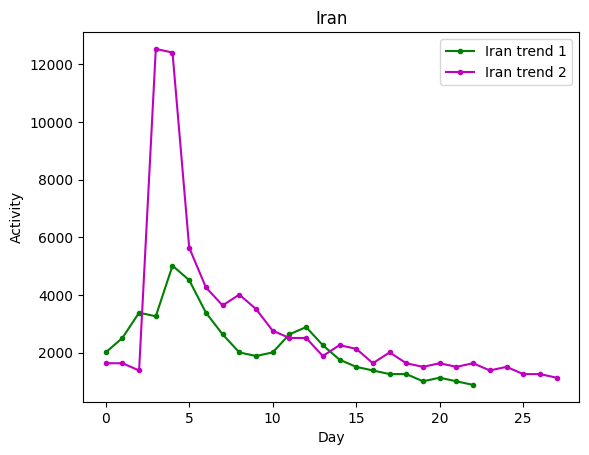

In [ ]:
data_iran = pd.DataFrame(data_Google['iran_scaled'])
data_iran1 = data_iran[7:30].reset_index(drop=True)
data_iran2 = data_iran[65:].reset_index(drop=True)
# print(data_raygun)
plt.plot(data_iran1, 'g.-')
plt.plot(data_iran2, 'm.-')
plt.title('Iran')
plt.xlabel('Day')
plt.ylabel('Activity')
plt.legend(['Iran trend 1', 'Iran trend 2'])

##BRICS:

Text(0, 0.5, 'Activity')

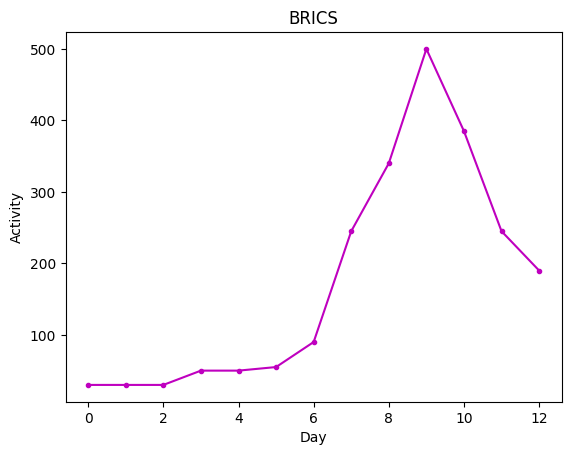

In [ ]:
data_brics = pd.DataFrame(data_Google['brics'])
data_brics = data_brics[80:].reset_index(drop=True)
plt.plot(data_brics, 'm.-')
plt.title('BRICS')
plt.xlabel('Day')
plt.ylabel('Activity')

##Web Scraping Data:

In [ ]:
## Function for plotting Google Trends vs. Google News data:
def comp_plots(data_trends, label, data_news):
      fig, ax1 = plt.subplots(dpi=600)
      ax2 = ax1.twinx()

      ax1.plot(data_trends['Day'], data_trends[label], 'g.-', label='Google Trends')
      ax2.plot(data_news, 'r.--', label='Google News')
      ax1.set_ylabel('Google Trends', color='g')
      ax2.set_ylabel('Google News', color='r')
      ax2.spines['left'].set_color('g')
      ax2.spines['right'].set_color('r')
      ax1.tick_params(axis='y', labelcolor='g')
      ax2.tick_params(axis='y', labelcolor='r')
      # plt.legend()

def comp_plots2(data_trends, label, data_news, width):
      fig, ax1 = plt.subplots(dpi=600, figsize=(width, 5))
      ax2 = ax1.twinx()

      ax1.plot(data_trends['Month-Day'], data_trends[label], 'g.-', label='Google Trends')
      ax2.plot(data_news, 'r.--', label='Google News')
      ax1.set_ylabel('Google Trends', color='g')
      ax2.set_ylabel('Google News', color='r')
      ax2.spines['left'].set_color('g')
      ax2.spines['right'].set_color('r')
      ax1.tick_params(axis='y', labelcolor='g')
      ax2.tick_params(axis='y', labelcolor='r')
      # plt.legend()


def comp_plots3(data_trends, label, data_news, width):
      fig, ax1 = plt.subplots(dpi=600, figsize=(width, 5))
      ax2 = ax1.twinx()

      ax1.plot(data_trends['Day'], data_trends[label], 'g.-', label='Google Trends')
      ax2.plot(data_news, 'r.--', label='Google News')
      ax1.set_ylabel('Google Trends', color='g')
      ax2.set_ylabel('Google News', color='r')
      ax2.spines['left'].set_color('g')
      ax2.spines['right'].set_color('r')
      ax1.tick_params(axis='y', labelcolor='g')
      ax2.tick_params(axis='y', labelcolor='r')
      # plt.legend()

In [ ]:
def format(data, label):
    data = pd.DataFrame(data)
    data['Day']=data['Date'].str[:2]
    data['Month']=data['Date'].str[3:5]
    data['Month-Day']=data['Month']+'.'+data['Day']
    data = data.sort_values(by=[label])
    # news = data['Day'].value_counts().sort_index()
    # date_list = data['Day'].unique()
    # # print(date_list)
    # # min(data_raygun_scraped['Date'])[:2]
    # plt.hist(data['Day'], bins=len(date_list))
    return data

def count(data, label, width):
    news = data[label].value_counts().sort_index()
    print(news)
    date_list = data[label].unique()
    # print(date_list)
    # min(data_raygun_scraped['Date'])[:2]
    # plt.hist(data['Day'], bins=len(date_list))
    plt.figure(figsize=(width, 5))
    plt.plot(news, 'r.')
    return news

## Rachael Gunn:

In [ ]:
data_raygun_scraped = pd.read_csv(path_to_data + "raygun_news.csv", sep=",", header=0)
data_raygun_scraped = format(data_raygun_scraped, 'Day')
data_raygun_scraped

,Title,News Agency,Link,Date,Day,Month,Month-Day
37,"5 Things to Know About Rachael 'Raygun' Gunn, ...",Us Weekly,https://news.google.com/rss/articles/CBMiowFBV...,09-08-2024,09,08,08.09
30,Raygun becomes viral sensation during breaking...,USA TODAY,https://news.google.com/rss/articles/CBMi9wFBV...,09-08-2024,09,08,08.09
89,Australian Breakdancer Goes Viral as Sport Mak...,Variety,https://news.google.com/rss/articles/CBMirwFBV...,10-08-2024,10,08,08.10
61,Breaking at the Olympics gets off to an ... in...,National Post,https://news.google.com/rss/articles/CBMijAFBV...,10-08-2024,10,08,08.10
59,Viral Olympic B-Girl Raygun Offers Blunt Quote...,Sports Illustrated,https://news.google.com/rss/articles/CBMifEFVX...,10-08-2024,10,08,08.10
...,...,...,...,...,...,...,...
36,Social media accelerates trolling – just look ...,The Conversation,https://news.google.com/rss/articles/CBMizwFBV...,22-08-2024,22,08,08.22
76,Raygun's viral Olympic performance has been re...,indy100,https://news.google.com/rss/articles/CBMihAFBV...,22-08-2024,22,08,08.22
58,Viral Olympics Breakdancer Raygun Reportedly S...,Variety Australia,https://news.google.com/rss/articles/CBMipAFBV...,23-08-2024,23,08,08.23
56,Synchronized swimmer dunks on lousy Raygun Oly...,Toronto Sun,https://news.google.com/rss/articles/CBMitgFBV...,23-08-2024,23,08,08.23


Day
09     2
10     8
11     2
12    10
13     9
14     7
15    27
16    12
17     4
18     2
19     2
22     2
23     2
26     1
Name: count, dtype: int64


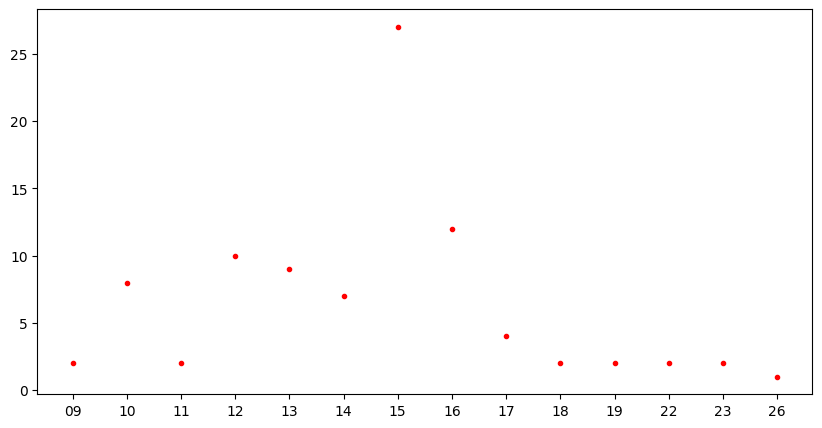

In [ ]:
news_raygun = count(data_raygun_scraped, 'Day', 10)

## Christopher Columbus:

In [ ]:
data_columb_scraped = pd.read_csv(path_to_data + "christopher_columbus_news.csv", sep=",", header=0)
data_columb_scraped = format(data_columb_scraped, 'Day')
data_columb_scraped

,Title,News Agency,Link,Date,Day,Month,Month-Day
17,Research confirms authenticity of Christopher ...,EL PAÍS USA,https://news.google.com/rss/articles/CBMivwFBV...,10-10-2024,10,10,10.10
35,Expectation for a documentary by RTVE about th...,La Vanguardia,https://news.google.com/rss/articles/CBMi-AFBV...,10-10-2024,10,10,10.10
8,Spanish scientists to shed light on mystery of...,Reuters,https://news.google.com/rss/articles/CBMiqAFBV...,10-10-2024,10,10,10.10
0,Christopher Columbus's DNA to shed light on hi...,BBC.com,https://news.google.com/rss/articles/CBMiWkFVX...,11-10-2024,11,10,10.11
51,Researchers Claim Bones in Spanish Church Belo...,Gizmodo,https://news.google.com/rss/articles/CBMipgFBV...,11-10-2024,11,10,10.11
...,...,...,...,...,...,...,...
46,Was Christopher Columbus Jewish? His DNA is be...,MSN,https://news.google.com/rss/articles/CBMivAJBV...,20-10-2024,20,10,10.20
92,Christopher Columbus breakthrough as DNA study...,MSN,https://news.google.com/rss/articles/CBMi6wFBV...,21-10-2024,21,10,10.21
80,Christopher Columbus revealed to be Spanish an...,MSN,https://news.google.com/rss/articles/CBMi7AJBV...,21-10-2024,21,10,10.21
60,RTVE Launches Columbus' DNA: His True Origin I...,TTV News,https://news.google.com/rss/articles/CBMimwFBV...,22-10-2024,22,10,10.22


Day
10     3
11    11
12     6
13    23
14    29
15     5
16     6
17     8
18     2
19     1
20     2
21     2
22     2
Name: count, dtype: int64


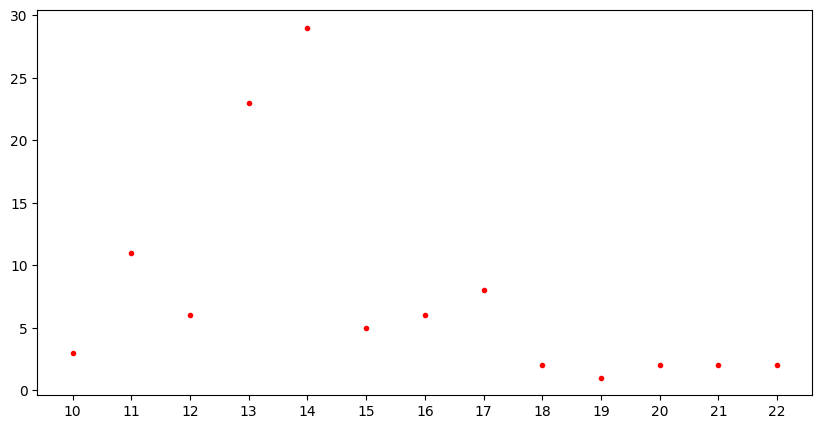

In [ ]:
news_columb = count(data_columb_scraped, 'Day', 10)

##Moo Deng:

In [ ]:
data_moo_scraped = pd.read_csv(path_to_data + "moo_deng_news.csv", sep=",", header=0)
data_moo_scraped = format(data_moo_scraped, 'Month-Day')
data_moo_scraped

,Title,News Agency,Link,Date,Day,Month,Month-Day
36,"She's an Icon, She's a Legend, and She Is the ...",TIME,https://news.google.com/rss/articles/CBMikAFBV...,12-09-2024,12,09,09.12
75,Zoo chief vows action against visitors harassi...,Nation Thailand,https://news.google.com/rss/articles/CBMiYkFVX...,12-09-2024,12,09,09.12
0,"Who Is Moo Deng? The Viral Baby Hippo, Explained",Forbes,https://news.google.com/rss/articles/CBMitAFBV...,13-09-2024,13,09,09.13
26,'I set a goal to make her famous': the baby py...,The Guardian,https://news.google.com/rss/articles/CBMipAFBV...,13-09-2024,13,09,09.13
77,Baby Hippo named Moo becomes viral sensation,NBC News,https://news.google.com/rss/articles/CBMilgFBV...,13-09-2024,13,09,09.13
...,...,...,...,...,...,...,...
56,From Moo Deng the pygmy hippo to Pesto the pen...,CBC.ca,https://news.google.com/rss/articles/CBMiWkFVX...,12-10-2024,12,10,10.12
88,What the Hell Happened: Moo Deng's World Dengi...,Harvard Crimson,https://news.google.com/rss/articles/CBMigwFBV...,15-10-2024,15,10,10.15
42,"Why do we love Moo Deng, Pesto and other baby ...",USA TODAY,https://news.google.com/rss/articles/CBMiqgFBV...,18-10-2024,18,10,10.18
96,Moo Deng Halloween Costume Ideas For Stans Of ...,Betches,https://news.google.com/rss/articles/CBMiakFVX...,21-10-2024,21,10,10.21


Month-Day
09.12    2
09.13    6
09.14    2
09.16    4
09.17    2
09.18    6
09.19    7
09.20    8
09.21    1
09.22    1
09.23    5
09.24    7
09.25    3
09.26    5
09.27    4
09.28    2
09.29    3
09.30    7
10.01    3
10.02    4
10.03    2
10.04    3
10.05    1
10.06    4
10.08    3
10.12    1
10.15    1
10.18    1
10.21    1
10.22    1
Name: count, dtype: int64


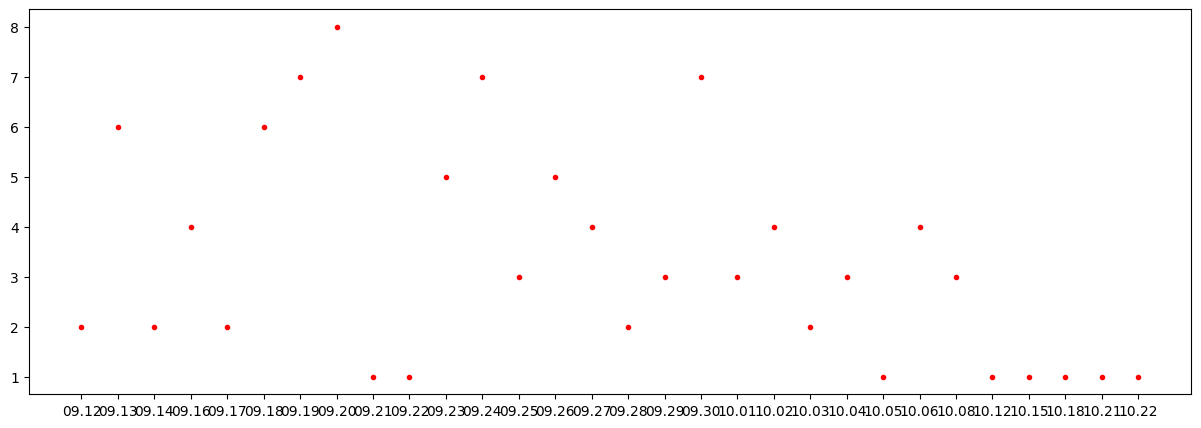

In [ ]:
news_moo = count(data_moo_scraped, 'Month-Day', 15)

##Trump:

In [ ]:
data_trump_scraped = pd.read_csv(path_to_data + "trump_news.csv", sep=",", header=0)
data_trump_scraped = format(data_trump_scraped, 'Day')
data_trump_scraped = data_trump_scraped[~data_trump_scraped['Day'].isin(['08', '09', '10'])]
data_trump_scraped

,Title,News Agency,Link,Date,Day,Month,Month-Day
51,2. Biden's and Trump's personal qualities and ...,Pew Research Center,https://news.google.com/rss/articles/CBMiqwFBV...,11-07-2024,11,07,07.11
45,Hungary's Viktor Orbán meets Donald Trump at M...,BBC.com,https://news.google.com/rss/articles/CBMiWkFVX...,11-07-2024,11,07,07.11
42,Hungary's Viktor Orbán to meet with Donald Tru...,The Guardian,https://news.google.com/rss/articles/CBMijAFBV...,11-07-2024,11,07,07.11
76,"Amid Doubts About Biden's Mental Sharpness, Tr...",Pew Research Center,https://news.google.com/rss/articles/CBMivAFBV...,11-07-2024,11,07,07.11
6,2024 US elections: 'The real scandal is that T...,Le Monde,https://news.google.com/rss/articles/CBMihgJBV...,11-07-2024,11,07,07.11
...,...,...,...,...,...,...,...
10,Why tech bros are backing Trump,BBC.com,https://news.google.com/rss/articles/CBMiWkFVX...,23-07-2024,23,07,07.23
5,'Trump would be the worst': Palestinians react...,Al Jazeera English,https://news.google.com/rss/articles/CBMirAFBV...,23-07-2024,23,07,07.23
94,Has Kamala Harris got what it takes to beat Do...,BBC.com,https://news.google.com/rss/articles/CBMiWkFVX...,23-07-2024,23,07,07.23
11,"As Trump's star rises, Netanyahu tries to reki...",Al Jazeera English,https://news.google.com/rss/articles/CBMingFBV...,23-07-2024,23,07,07.23


Day
11     6
12     5
13    11
14    11
15     7
16    17
17     8
18    10
19     6
20     2
21     2
22     1
23     5
Name: count, dtype: int64


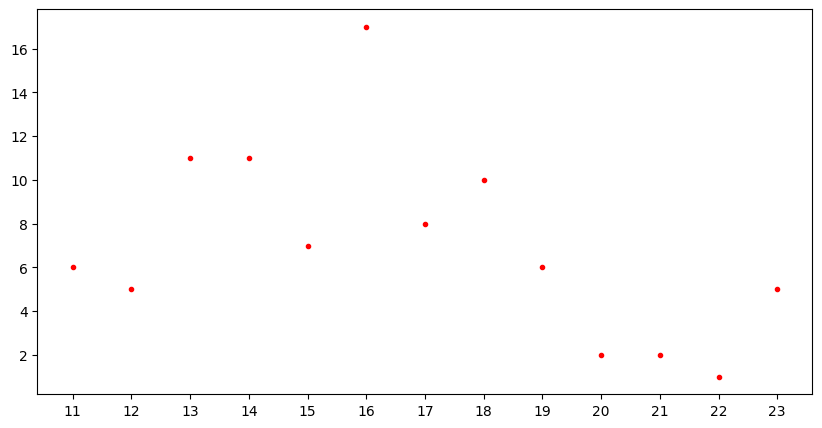

In [ ]:
news_trump = count(data_trump_scraped, 'Day', 10)

In [ ]:
news_trump_df = pd.DataFrame(news_trump)
news_trump_df

,count
Day,
08,1
09,4
10,4
11,6
12,5
13,11
14,11
15,7
16,17


##Iran:

In [ ]:
data_iran_scraped = pd.read_csv(path_to_data + "iran_news.csv", sep=",", header=0)
data_iran_scraped = format(data_iran_scraped, 'Month-Day')
data_iran_scraped = data_iran_scraped[~data_iran_scraped['Month-Day'].isin(['09.17', '09.19', '09.21', '09.23', '09.24', '09.25', '09.26'])]
data_iran_scraped

,Title,News Agency,Link,Date,Day,Month,Month-Day
85,Iran's Khamenei slams 'criminal' Israel for ki...,Al Jazeera English,https://news.google.com/rss/articles/CBMisgFBV...,28-09-2024,28,09,09.28
60,"What will Iran, Hezbollah and Israel do next a...",BBC.com,https://news.google.com/rss/articles/CBMiWkFVX...,28-09-2024,28,09,09.28
84,Opinion | What This Israel-Hezbollah-Hamas-Ira...,The New York Times,https://news.google.com/rss/articles/CBMimAFBV...,29-09-2024,29,09,09.29
71,Israel sends troops into Lebanon — but its rea...,POLITICO Europe,https://news.google.com/rss/articles/CBMipAFBV...,30-09-2024,30,09,09.30
25,Iran's 'Axis of Resistance' Outmatched By Isra...,Stimson Center,https://news.google.com/rss/articles/CBMiowFBV...,30-09-2024,30,09,09.30
...,...,...,...,...,...,...,...
47,An Israeli attack on Iran's nuclear facilities...,Al Jazeera English,https://news.google.com/rss/articles/CBMiqgFBV...,14-10-2024,14,10,10.14
63,Iran Shouldn't Expect Russia to Come Riding to...,Carnegie Endowment for International Peace,https://news.google.com/rss/articles/CBMimgFBV...,14-10-2024,14,10,10.14
4,Iran: seven individuals and seven entities san...,Présidence française du Conseil de l'Union eur...,https://news.google.com/rss/articles/CBMi_gFBV...,14-10-2024,14,10,10.14
99,Netanyahu tells U.S. that Israel will strike I...,The Washington Post,https://news.google.com/rss/articles/CBMikgFBV...,14-10-2024,14,10,10.14


Month-Day
09.28     2
09.29     1
09.30     4
10.01    21
10.02    21
10.03    12
10.04     7
10.05     3
10.06     1
10.07     2
10.08     1
10.09     2
10.11     5
10.12     2
10.13     1
10.14     4
10.15     1
Name: count, dtype: int64


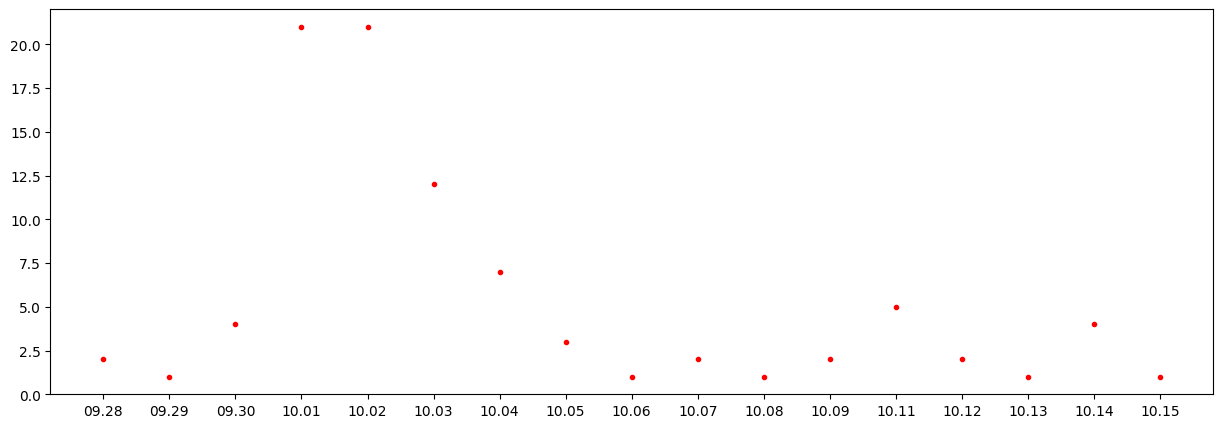

In [ ]:
news_iran = count(data_iran_scraped, 'Month-Day', 15)

##BRICS:

In [ ]:
data_brics_scraped = pd.read_csv(path_to_data + "brics_news.csv", sep=",", header=0)
data_brics_scraped = format(data_brics_scraped, 'Month-Day')
data_brics_scraped

,Title,News Agency,Link,Date,Day,Month,Month-Day
49,What proposals will Russia push at the BRICS s...,Reuters,https://news.google.com/rss/articles/CBMijwFBV...,16-10-2024,16,10,10.16
43,"At BRICS summit, Russia to push to end dollar ...",Reuters,https://news.google.com/rss/articles/CBMikAFBV...,16-10-2024,16,10,10.16
33,BRICS countries navigate new alternative payme...,Global Times,https://news.google.com/rss/articles/CBMiYkFVX...,17-10-2024,17,10,10.17
8,India's BRICS Balancing Act,United States Institute of Peace,https://news.google.com/rss/articles/CBMid0FVX...,17-10-2024,17,10,10.17
23,What's Driving a Bigger BRICS and What Does it...,United States Institute of Peace,https://news.google.com/rss/articles/CBMimAFBV...,17-10-2024,17,10,10.17
...,...,...,...,...,...,...,...
45,Venezuela furious at Brazil's Brics snub,BBC.com,https://news.google.com/rss/articles/CBMiWkFVX...,25-10-2024,25,10,10.25
14,Brics: How an evolving and expanding bloc bene...,BBC.com,https://news.google.com/rss/articles/CBMiWkFVX...,25-10-2024,25,10,10.25
80,BRICS Alliance Expands to Include 13 New Members,Democracy Now!,https://news.google.com/rss/articles/CBMinwFBV...,25-10-2024,25,10,10.25
79,Final day of BRICS Summit: Putin's press confe...,Brasil de Fato,https://news.google.com/rss/articles/CBMiywFBV...,25-10-2024,25,10,10.25


Day
16     2
17     3
18     4
19     1
20     1
21    12
22    24
23    22
24    23
25     8
Name: count, dtype: int64


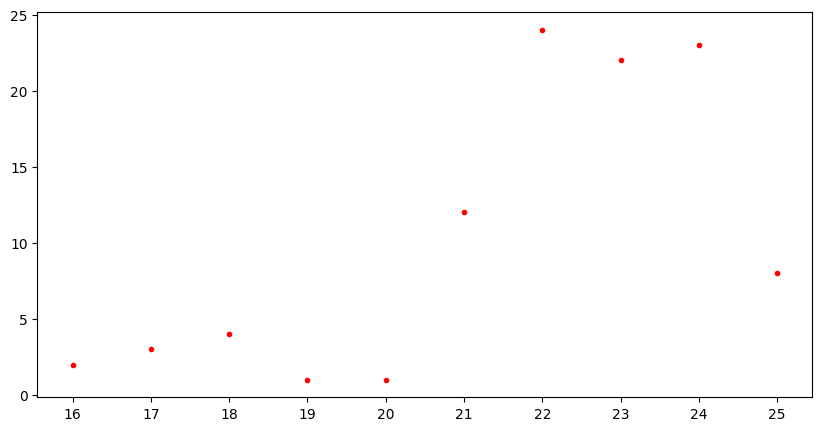

In [ ]:
news_brics = count(data_brics_scraped, 'Day', 10)

##SIR Model Fitting:



In [13]:
def SIR_model(y,t,beta,gamma):
    S,I,R=y
    dS_dt=-beta*S*I
    dI_dt=beta*S*I-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


def SIR_solver(mod, t, N, beta, gamma):
    Solution = pd.DataFrame()
    sol=scipy.integrate.odeint(mod,[S0,I0,R0],t,args=(beta,gamma))
    sol=np.array(sol)
    Solution['time']=t
    Solution['S(t)']=sol[:,0]
    Solution['I(t)']=sol[:,1]
    Solution['R(t)']=sol[:,2]
    return Solution



def SIR_plotter(sol, data):
    plt.figure(figsize=[6,4])
    plt.plot(sol['time'],sol['S(t)'],label="S(t)")
    plt.plot(sol['time'],sol['I(t)'],label="I(t)")
    plt.plot(sol['time'],sol['R(t)'],label="R(t)")
    plt.plot(data, 'm.')
    plt.grid()
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Number")
    plt.title("SIR model")
    plt.show()


def SIR_plotter_case(sol, data, label):
    plt.figure(figsize=[6,4])
    plt.plot(sol['time'],sol['I(t)'],label="I(t)")
    plt.plot(data, 'm.', label=label)
    plt.grid()
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Number")
    plt.title("SIR model")
    plt.show()


def SIR_fitter(mod, t, N, beta, gamma, data, label):
    SumSq = pd.DataFrame(columns = ['SumSquared'])
    Solution = pd.DataFrame()
    sol=scipy.integrate.odeint(mod,[S0,I0,R0],t,args=(beta,gamma))
    sol=np.array(sol)
    Solution['time']=t
    Solution['S(t)']=sol[:,0]
    Solution['I(t)']=sol[:,1]
    Solution['R(t)']=sol[:,2]
    Sum=0
    for j in range(len(data)):
      for i in range(len(t)):
        if Solution['time'][i]==j:
          diff = (Solution['I(t)'][i]-data[label][j])**2
        else:
          diff = 0
        Sum = Sum+diff
    return Sum
    print(Sum)
    # SumSq=pd.DataFrame(Sum)
    # SumSq.loc[len(SumSq)] = Sum


##Threshold Algorithm model:

In [18]:
def SIR_model_thresh(y,t,beta, A, gamma, thresh):
    S,I,R=y
    if I < thresh:
      beta1 = beta
    else:
      beta1 = beta+A
    dS_dt=-beta1*S*I
    dI_dt=beta1*S*I-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

def SIR_solver_thresh(mod, t, N, beta, A, gamma, thresh):
    Solution = pd.DataFrame()
    sol=scipy.integrate.odeint(mod,[S0,I0,R0],t,args=(beta,A,gamma, thresh))
    sol=np.array(sol)
    Solution['time']=t
    Solution['S(t)']=sol[:,0]
    Solution['I(t)']=sol[:,1]
    Solution['R(t)']=sol[:,2]
    return Solution

def SIR_fitter_thresh(mod, t, N, beta, A, gamma, thresh, data, label):
    SumSq = pd.DataFrame(columns = ['SumSquared'])
    Solution = pd.DataFrame()
    sol=scipy.integrate.odeint(mod,[S0,I0,R0],t,args=(beta,A, gamma, thresh))
    sol=np.array(sol)
    Solution['time']=t
    Solution['S(t)']=sol[:,0]
    Solution['I(t)']=sol[:,1]
    Solution['R(t)']=sol[:,2]
    Sum=0
    for j in range(len(data)):
      for i in range(len(t)):
        if Solution['time'][i]==j:
          diff = (Solution['I(t)'][i]-data[label][j])**2
        else:
          diff = 0
        Sum = Sum+diff
    return Sum
    print(Sum)

##Threshold Algorithm Model with Indirect Transmission:

In [8]:
def SIR_model_thresh_indir(y,t,beta, A, gamma, thresh):
    S,I,R=y
    if I < thresh:
      beta1 = beta * I
    else:
      beta1 = beta* I + A
    dS_dt=-beta1*S
    dI_dt=beta1*S-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


In [17]:
N=180
I0=1
R0=0.0
S0=N-I0-R0
beta=0.01
A=0.02
gamma=0.28
thresh = 50

t=np.linspace(0,26,600)
Solved=pd.DataFrame().reset_index()
Solved_thresh = SIR_solver_thresh(SIR_model_thresh, t, N, beta, A, gamma, thresh)
Solved_thresh_indir = SIR_solver_thresh(SIR_model_thresh_indir, t, N, beta, A, gamma, thresh)

In [14]:
## SIR fitting:

N=5000
R0=0.0
I0= 0.01*N
S0=N-I0-R0

t=np.linspace(0,26,261)

beta_vals= np.linspace(0.0003, 0.0004, 21)
gamma_vals = np.linspace(0.3, 0.4, 5)

SumSq = []
init = []
Beta = []
Gamma = []
# for I0 in I0_vals:
  # S0=N-I0-R0
for beta in beta_vals:
  for gamma in gamma_vals:
    Result = SIR_fitter(SIR_model, t, N, beta, gamma, data_raygun, 'raygun')
    # init.append(I0)
    Beta.append(beta)
    Gamma.append(gamma)
    SumSq.append(Result)

ParamFit = pd.DataFrame([Beta, Gamma, SumSq]).T
ParamFit.columns=['Beta', 'Gamma', 'SumSq']
# print(ParamFit)

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

       Beta  Gamma         SumSq
80  0.00038    0.3  1.031580e+06


In [373]:
## Algorithm-enhanced fitter:

N=300000
R0=0.0
I0= 50
S0=N-I0-R0
thresh = 0
# A=0.02

t=np.linspace(0,26,261)

beta_vals= [0.000018]  #np.linspace(0.00009, 0.0001, 21)
gamma_vals = [4.6] #np.linspace(47, 48, 6)
A_vals = [0.000001] #np.linspace(0.0, 0.00002, 6)

SumSq = []
A_val = []
Beta = []
Gamma = []
# for I0 in I0_vals:
  # S0=N-I0-R0
for A in A_vals:
  for beta in beta_vals:
    for gamma in gamma_vals:
      Result = SIR_fitter_thresh(SIR_model_thresh, t, N, beta, A, gamma, thresh, data_raygun, 'raygun')
      # init.append(I0)
      Beta.append(beta)
      A_val.append(A)
      Gamma.append(gamma)
      SumSq.append(Result)

ParamFit = pd.DataFrame([A_val, Beta, Gamma, SumSq]).T
ParamFit.columns=['A', 'Beta', 'Gamma', 'SumSq']
ParamFit

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

          A      Beta  Gamma         SumSq
0  0.000001  0.000018    4.6  3.593543e+07


1.8e-05
4.6
35935425.28882413


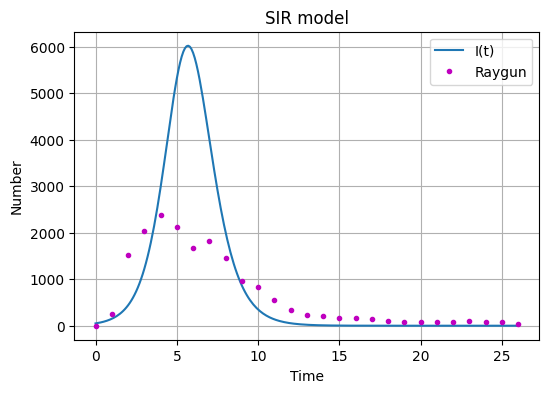

In [374]:
A = BestFit[0,0]
beta = BestFit[0,1]
gamma = BestFit[0,2]
sumsq = BestFit[0,3]
print(beta)
print(gamma)
print(sumsq)

Solved = SIR_solver_thresh(SIR_model_thresh, t, N, A, beta, gamma, thresh)
# Solved
SIR_plotter_case(Solved, data_raygun, 'Raygun')

## Christopher Columbus DNA:

In [208]:
## Algorithm-enhanced fitter:

N=300000
R0=0.0
I0= 1 #0.01*N
S0=N-I0-R0
thresh = 0
# A=0.02

t=np.linspace(0,26,261)

beta_vals= np.linspace(0.000095, 0.000105, 21) #[0.000098]
A_vals = np.linspace(0.00006, 0.00008, 11)  #[0.00006]
gamma_vals = np.linspace(50, 51, 21)  #[46.2]


SumSq = []
A_val = []
Beta = []
Gamma = []
# for I0 in I0_vals:
  # S0=N-I0-R0
for A in A_vals:
  for beta in beta_vals:
    for gamma in gamma_vals:
      Result = SIR_fitter_thresh(SIR_model_thresh, t, N, beta, A, gamma, thresh, data_columb, 'columb_dna') # data_raygun, 'raygun')
      # init.append(I0)
      Beta.append(beta)
      A_val.append(A)
      Gamma.append(gamma)
      SumSq.append(Result)

ParamFit = pd.DataFrame([A_val, Beta, Gamma, SumSq]).T
ParamFit.columns=['A', 'Beta', 'Gamma', 'SumSq']
ParamFit

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

             A      Beta  Gamma        SumSq
2624  0.000070  0.000105   51.0  2405.554729
2981  0.000072  0.000102   51.0  2405.554729
3338  0.000074  0.000101   51.0  2405.554729
3695  0.000076  0.000099   51.0  2405.554729
4052  0.000078  0.000097   51.0  2405.554729


0.0001045
51.0
2405.5547285403827


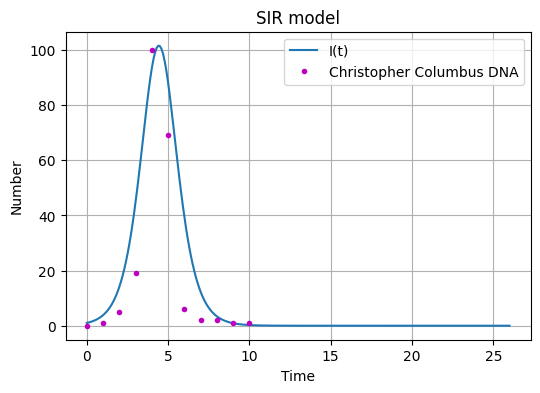

In [209]:
A = BestFit[0,0]
beta = BestFit[0,1]
gamma = BestFit[0,2]
sumsq = BestFit[0,3]
print(beta)
print(gamma)
print(sumsq)

Solved = SIR_solver_thresh(SIR_model_thresh, t, N, A, beta, gamma, thresh)
# Solved
SIR_plotter_case(Solved, data_columb, 'Christopher Columbus DNA') # data_raygun, 'Raygun')

In [ ]:
N=180
I0=1
R0=0.0
S0=N-I0-R0
beta=0.01
gamma=0.28

t=np.linspace(0,26,600)
Solved=pd.DataFrame().reset_index()
Solved = SIR_solver(SIR_model, t, N, beta, gamma)

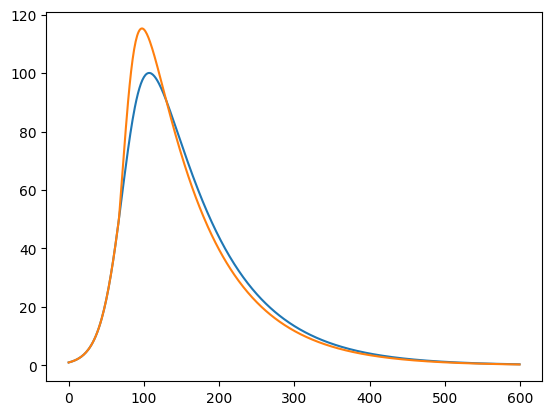

In [ ]:
plt.plot(Solved['I(t)'])
plt.plot(Solved_thresh['I(t)'])